In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np

In [73]:
def kmr_markov_matrix(p=1/3, N=6, epsilon=0.0001):
    """
    Generate the transition probability matrix for the KMR dynamics with
    two acitons.

    """
    P = np.zeros((N+1, N+1))
    P[0,0] = 1 - epsilon
    P[0,1] = epsilon
    P[N,N] = 1 - epsilon
    P[N,N-1] = epsilon
    for n in range(1, N):
        if (n-1)/(N-1) < p:
            a1_ratio = (n-1)/(N-1)
        elif (n-1)/(N-1) == p:
            a1_ratio = (n-1)/(N-1)/2
        else:
            a1_ratio = 0
        P[n, n-1] = (n/N) * ((epsilon/2) + (1-epsilon)*(a1_ratio))
        if (n / (N-1)) > p:
            a2_ratio = n / (N-1)
        elif n / (N-1) == p:
            a2_ratio = n / (N-1) / 2
        else:
            a2_ratio = 0
        P[n, n+1] = ((N-n)/N) * ((epsilon/2) + ((1-epsilon) * a2_ratio))
        P[n, n] = 1 - P[n, n-1] - P[n, n+1]
    return P


In [50]:
import quantecon as qe
P =  kmr_markov_matrix()
mc = qe.MarkovChain(P)

In [62]:
mc

Markov chain with transition matrix 
P = 
[[ 0.9         0.1         0.          0.          0.          0.          0.        ]
 [ 0.00833333  0.95        0.04166667  0.          0.          0.          0.        ]
 [ 0.          0.07666667  0.65        0.27333333  0.          0.          0.        ]
 [ 0.          0.          0.025       0.68        0.295       0.          0.        ]
 [ 0.          0.          0.          0.03333333  0.71        0.25666667
   0.        ]
 [ 0.          0.          0.          0.          0.04166667  0.8
   0.15833333]
 [ 0.          0.          0.          0.          0.          0.1         0.9       ]]
and stationary distributions 
[[  9.29033476e-05   1.11484017e-03   6.05891397e-04   6.62441261e-03
    5.86260516e-02   3.61136478e-01   5.71799423e-01]]

In [63]:
mc.stationary_distributions

array([[  9.29033476e-05,   1.11484017e-03,   6.05891397e-04,
          6.62441261e-03,   5.86260516e-02,   3.61136478e-01,
          5.71799423e-01]])

In [90]:
mc.simulate(0, 100)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4,
       5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6])

In [65]:
#MarkovChain クラスのメソッドを使うところまでできました。

In [66]:
import matplotlib.pyplot as plt

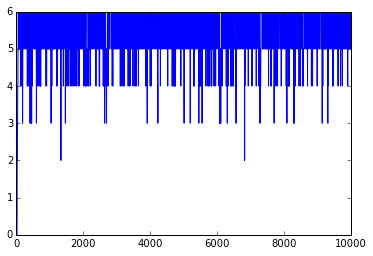

In [83]:
fig, ax = plt.subplots()
ax.plot(mc.simulate(0, 10000))
show = plt.show()

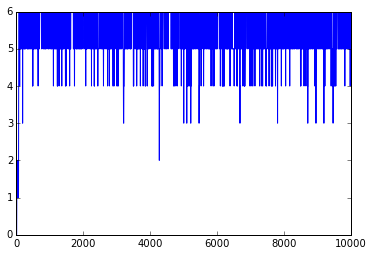

In [96]:
t = 10**4
x = np.array(range(t))
y = mc.simulate(0, t)
plt.plot(x, y)
plt.show()